In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function defenitions

In [20]:
def create_trajectory(σ, length):
    trajectory_noize = np.random.normal(0, σ, size=length)
    trajectory = np.ones(length) * 10

    for i in range(1, length):
        trajectory[i] = trajectory[i-1] + trajectory_noize[i]
        
    return trajectory
    
def create_measurement(σ, base_trajectory):
    measurement_noize = np.random.normal(0, σ, size=len(base_trajectory)) 
    trajectory_measured = np.copy(base_trajectory) + measurement_noize
    
    return trajectory_measured

def get_alfa(σ, η):
    ψ = (σ) / (η ** 2)
    α = (-ψ + (ψ **2 + 4 * ψ) ** 0.2) / 2
    
    return α

def get_smoothed_exp(raw_array, α, direction="forward"):
    trajectory_smooth = np.copy(raw_array)
    
    if direction == "forward":
        for i in range(1, len(raw_array)):
            delta = raw_array[i] - trajectory_smooth[i-1]
            trajectory_smooth[i] = trajectory_smooth[i-1] + α * (delta)
    else:
        for i in range(len(raw_array) - 2, 0, -1):
            delta = raw_array[i] - trajectory_smooth[i+1]
            trajectory_smooth[i] = trajectory_smooth[i+1] + α * (delta)
        
    return trajectory_smooth

def get_smoothed_running_mean(raw_array, M):
    delay = round((M - 1) / 2)
    trajectory_smooth = np.copy(raw_array)
    
    for i in range(0, delay):
        trajectory_smooth[i] = np.mean(raw_array[:delay])
        
    for i in range(delay, len(raw_array) - delay):
        trajectory_smooth[i] = np.mean(raw_array[(i-delay):i+delay])
        
    for i in range(len(raw_array) - 1, len(raw_array) - delay - 1, -1):
        trajectory_smooth[i] = np.mean(raw_array[-delay:])
        
    return trajectory_smooth
    

In [3]:
big_arr_size = 3000
small_arr_size = 300
σ_t = 12 ** 0.5
σ_m = 9 ** 0.5

trajectory_small = create_trajectory(σ_t, small_arr_size)
trajectory_big = create_trajectory(σ_t, big_arr_size)
trajectory_measured_small = create_measurement(σ_m, trajectory_small)
trajectory_measured_big = create_measurement(σ_m, trajectory_big)


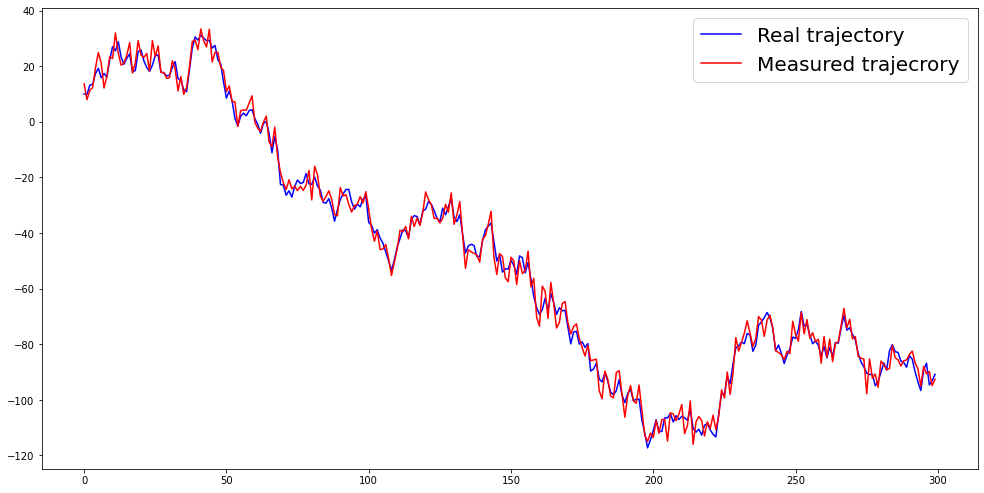

In [4]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory_small, "blue")
axes.plot(trajectory_measured_small, "red")
axes.legend(["Real trajectory", "Measured trajecrory"], fontsize=20)

plt.show()



In [5]:
Ev, Eq = 0., 0.

for i in range(1, small_arr_size):
    Ev += (trajectory_measured_small[i] - trajectory_measured_small[i-1]) ** 2
Ev /= small_arr_size - 1

for i in range(2, small_arr_size):
    Eq += (trajectory_measured_small[i] - trajectory_measured_small[i-2]) ** 2
Eq /= small_arr_size - 2

σ_t_small = ((Eq - 2 * Ev) / -2)
σ_m_small = ((Ev - σ_t_small) / 2)

for i in range(1, big_arr_size):
    Ev += (trajectory_measured_big[i] - trajectory_measured_big[i-1]) ** 2
Ev /= big_arr_size - 1

for i in range(2, big_arr_size):
    Eq += (trajectory_measured_big[i] - trajectory_measured_big[i-2]) ** 2
Eq /= big_arr_size - 2

σ_t_big = ((Eq - 2 * Ev) / -2)
σ_m_big = ((Ev - σ_t_big) / 2)

print("\n Estimated σ 300 =", σ_t_small, "| Estimated η =", σ_m_small,
      "\n Estimated σ 3000 =", σ_t_big, "| Estimated η 3000 =", σ_m_big,
      "\n Real σ =", (σ_t ** 2), "| Real η =", (σ_m ** 2))
      
     
      


 Estimated σ 300 = 9.914256664428152 | Estimated η = 12.411205140364721 
 Estimated σ 3000 = 8.976043463059977 | Estimated η 3000 = 10.90608361845221 
 Real σ = 11.999999999999998 | Real η = 9.0


In [6]:
α = get_alfa(σ_t_big, σ_m_big)
print(α)

trajectory_smooth_exp = get_smoothed_exp(trajectory_measured_small, α) 


0.35722897823629285


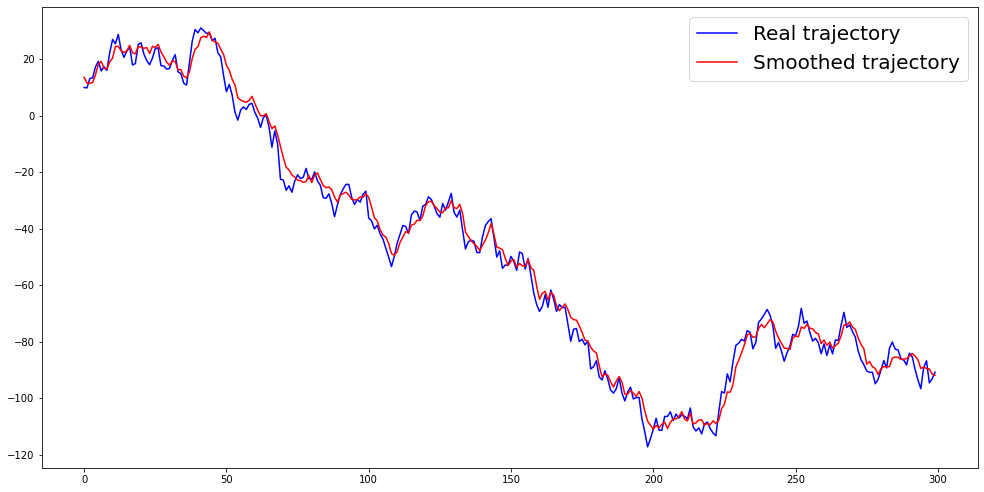

In [7]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory_small, "blue")
axes.plot(trajectory_smooth_exp, "red")
axes.legend(["Real trajectory", "Smoothed trajectory"], fontsize=20)

plt.show()


# Part 2

In [8]:
array_size = 300
σ_t = 28
σ_m = 97

trajectory = create_trajectory(σ_t, array_size)
measurement = create_measurement(σ_m, trajectory)

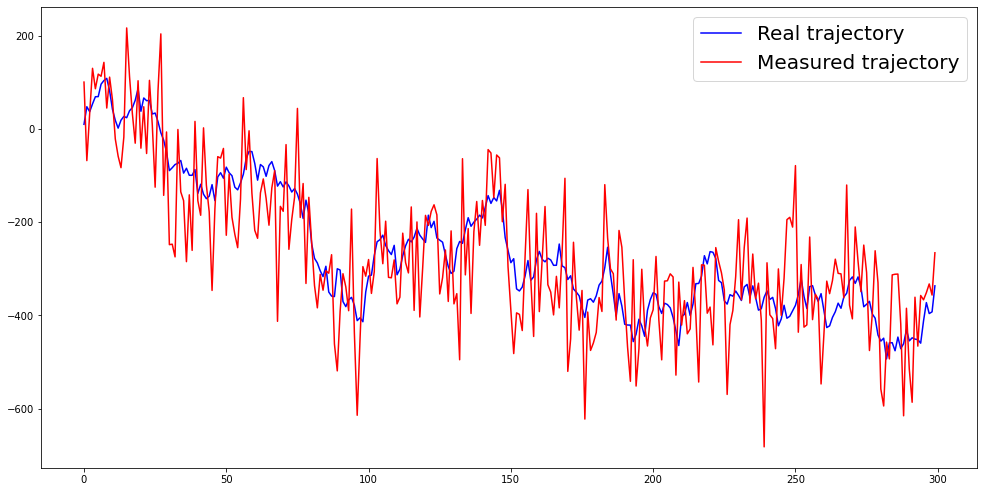

In [9]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory, "blue")
axes.plot(measurement, "red")
axes.legend(["Real trajectory", "Measured trajectory"], fontsize=20)

plt.show()


In [10]:
α = get_alfa(σ_t, σ_m)
print(α)

M = round((2 - α) / α)
print(M)

smooth_exp = get_smoothed_exp(measurement, α)
smooth_running_mean = get_smoothed_running_mean(measurement, M)

0.2046554993128561
9
[  49.11651969   49.11651969   49.11651969   49.11651969   86.31344463
  117.691001    113.09393201  142.95702667   44.93898352  111.29990497
   62.81893639  -21.44069565  -58.45139629  -83.06624029  -17.40421437
  216.80457167  112.65975656   32.96189337  -30.52491655  103.50469157
  -41.22242212   47.71737377  -52.63384871  104.35491474    8.60540571
 -124.92406719   81.48344178  204.05954772 -142.45412393   -6.40493507
 -248.25121009 -247.25148437 -274.48433801   -1.11267789 -134.90768002
 -153.87079418 -284.74647977 -141.3632752  -260.51429473   16.23243381
 -153.78959862 -185.17362886    2.37341294 -120.39402494 -178.09644617
 -346.49568519 -171.32950264  -59.42654736  -62.4584649   -41.76877545
 -228.09297814  -96.77305306 -189.69024128 -226.01713248 -254.72965291
 -150.07861331   67.15457911  -87.14717648   -3.90610108 -137.576883
 -217.41193227 -234.5997281  -137.06140181 -107.21278295 -149.19945392
 -206.54292499 -126.51454803  -89.45433239 -412.81088381 -

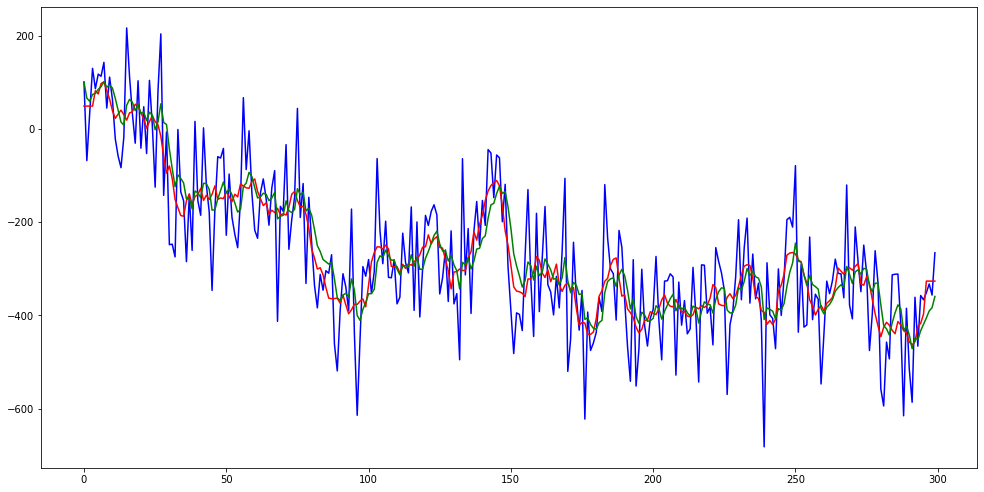

In [11]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(measurement, "blue")
axes.plot(smooth_running_mean, "red")
axes.plot(smooth_exp, "green")

plt.show()

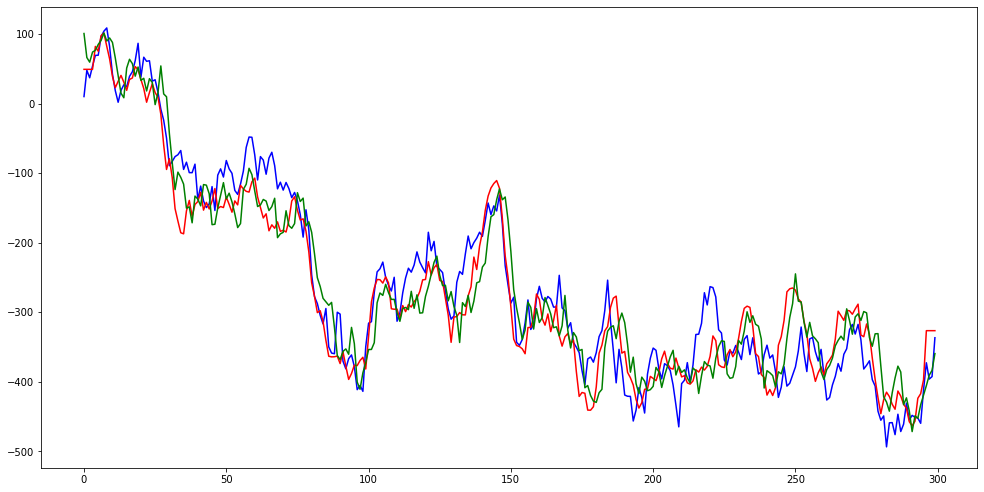

In [12]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory, "blue")
axes.plot(smooth_running_mean, "red")
axes.plot(smooth_exp, "green")

plt.show()

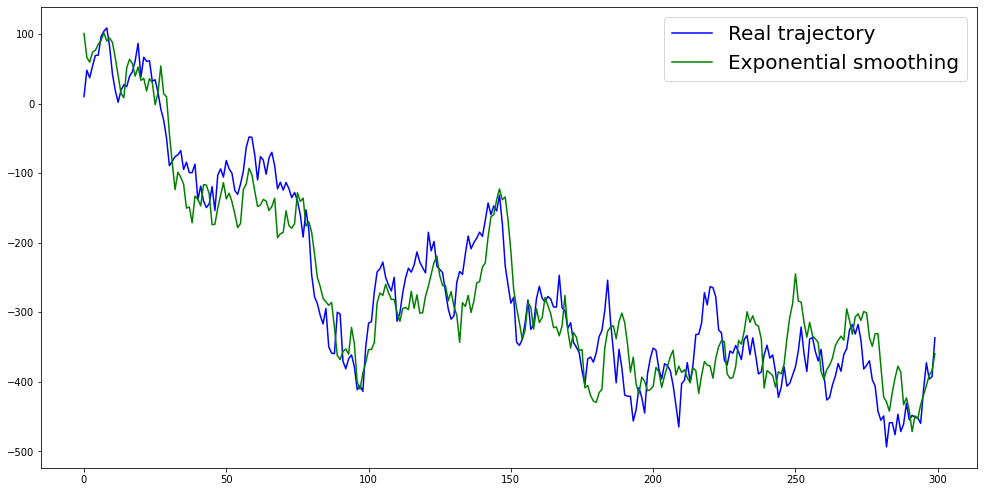

In [13]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory, "blue")
axes.plot(smooth_exp, "green")
axes.legend(["Real trajectory", "Exponential smoothing"], fontsize=20)

plt.show()

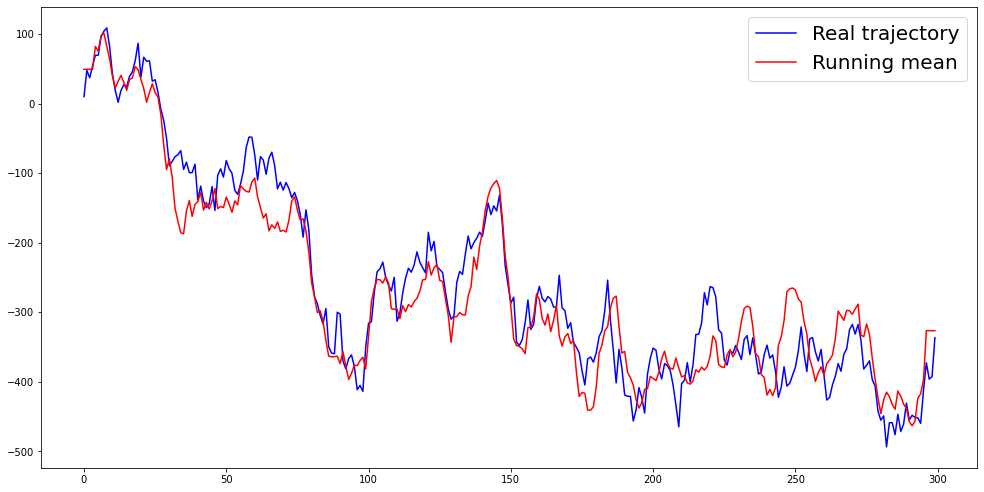

In [14]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory, "blue")
axes.plot(smooth_running_mean, "red")
axes.legend(["Real trajectory", "Running mean"], fontsize=20)

plt.show()

# Task 3 
## Part 1

In [15]:
smooth_exp_back = get_smoothed_exp(smooth_exp, α, direction="bakward")

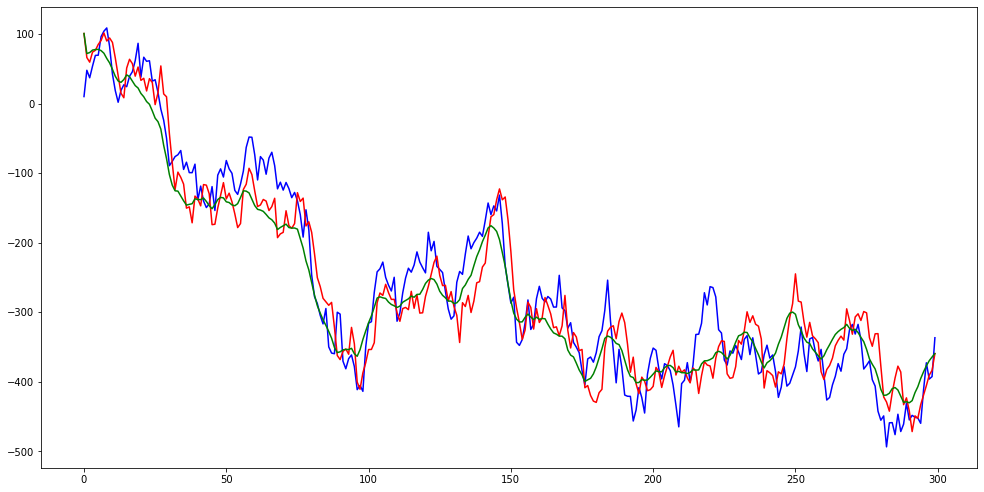

In [16]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory, "blue")
axes.plot(smooth_exp, "red")
axes.plot(smooth_exp_back, "green")

plt.show()

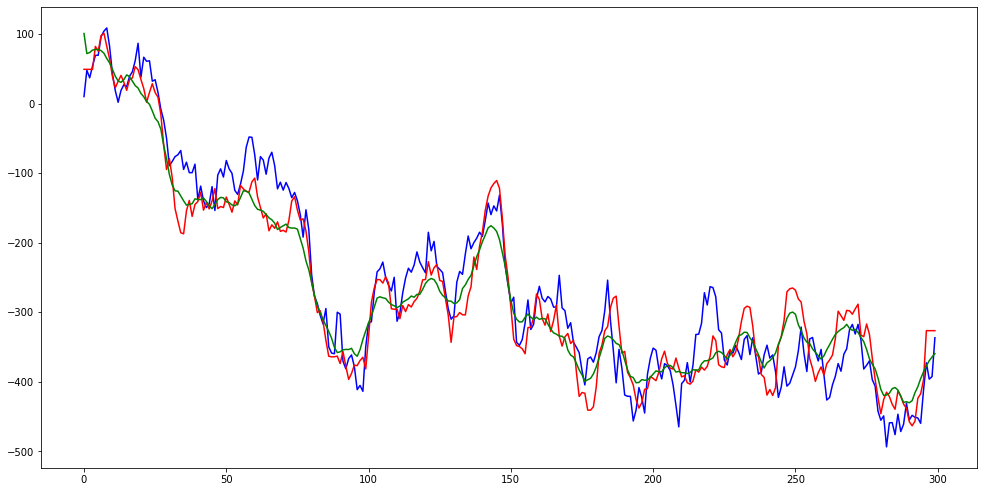

In [17]:
figure = plt.figure(figsize=[10,8])

axes = figure.add_axes([1, 1, 1.3, 0.8])

axes.plot(trajectory, "blue")
axes.plot(smooth_running_mean, "red")
axes.plot(smooth_exp_back, "green")

plt.show()

In [31]:
def get_var_coeff(smooth_array):
    Iv = 0

    for i in range(0, array_size - 2):
        Iv += (smooth_array[i+2] - 2 * smooth_array[i+1] + smooth_array[i]) ** 2
    
    return Iv

def get_div_coeff(smooth_array, raw_array):
    tmp_array = np.copy(raw_array)
    tmp_array -= smooth_array
    tmp_array = tmp_array ** 2

    return tmp_array.sum()


In [32]:
Id_exp = get_div_coeff(smooth_exp_back, measurement)
print("Exponential smoothing =", Id_exp)

Id_ran = get_div_coeff(smooth_running_mean, measurement)
print("Running mean =", Id_ran)

print(Id_ran/Id_exp)

Exponential smoothing = 2617471.3369587976
Running mean = 2595628.747696709
0.991655079865185


In [33]:


Iv_exp = get_var_coeff(smooth_exp_back)
Iv_ran = get_var_coeff(smooth_running_mean)
    
print("\n Exponential smoothing =", Iv_exp,
      "\n Running mean =", Iv_ran)

print("Smooth relation =",Iv_ran/Iv_exp)


 Exponential smoothing = 8095.847278380489 
 Running mean = 163227.01027503042
Smooth relation = 20.161819345446286


## Conclusion 

1. Forward-backward exponential smoothing method has more smooth result without sheeft
2. Forward-backward exponential smoothing method has almost the same Derivetiv coefficient as running mean method (difference < 10%)
3. Forward-backward exponential smoothing method has significantly better variability coefficient as running mean method (difference > 1000%)